In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [2]:
df = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\Project 3\fdf_gdf.csv', low_memory=False, sep=",")

# # Optimize memory usage by downcasting numerical columns
# for col in df.select_dtypes(include=['int64', 'float64']).columns:
# 	if df[col].dtype == 'int64':
# 		df[col] = pd.to_numeric(df[col], downcast='integer')
# 	elif df[col].dtype == 'float64':
# 		df[col] = pd.to_numeric(df[col], downcast='float')

In [3]:
# Convert categorical columns to category type for memory efficiency
df["rideable_type"] = df["rideable_type"].astype("category")
df["start_station_name"] = df["start_station_name"].astype("category")
df["end_station_name"] = df["end_station_name"].astype("category")
df["member_casual"] = df["member_casual"].astype("category")
df["day_of_week"] = df["day_of_week"].astype("category")
df["holiday"] = df["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df["holiday"] = df["holiday"].astype("category")

df['month'] = df['month'].astype('int32')

df["ride_duration"] = pd.to_timedelta(df["ride_duration"])

# Filter dataframe for Ward 2

In [4]:
df_w2 = df[df['start_ward'] == 2]

In [5]:
df_w2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration,start_ward,end_ward,ride_duration_min
3,8494852,classic_bike,2023-07-21 21:31:20,2023-07-21 21:38:29,New Hampshire Ave & Ward Pl NW,31212.0,16th & R St NW,31282.0,38.905711,-77.047318,38.912652,-77.036278,casual,1.228064,7,2023,Summer,Friday,No,No,0 days 00:07:09,2,2,7.150000
5,8006328,electric_bike,2023-06-18 00:26:26,2023-06-18 00:37:54,13th St & New York Ave NW,31227.0,16th & Harvard St NW,31135.0,38.900273,-77.029905,38.926102,-77.036650,member,2.930742,6,2023,Summer,Sunday,No,Yes,0 days 00:11:28,2,1,11.466667
8,9276322,classic_bike,2023-09-11 18:01:16,2023-09-11 18:20:19,8th & H St NW,31228.0,New Hampshire Ave & 24th St NW,31275.0,38.899700,-77.023086,38.901755,-77.051084,casual,2.433581,9,2023,Autumn,Monday,No,No,0 days 00:19:03,2,2,19.050000
16,10564381,classic_bike,2023-12-14 17:54:03,2023-12-14 19:01:34,19th & G St NW,31279.0,Broad Branch Rd & Northampton St NW,31422.0,38.898412,-77.043182,38.965775,-77.068626,member,7.807068,12,2023,Winter,Thursday,No,No,0 days 01:07:31,2,3,67.516667
18,8832736,classic_bike,2023-08-13 13:45:19,2023-08-13 13:52:44,M St & Pennsylvania Ave NW,31246.0,37th & O St NW / Georgetown University,31236.0,38.905126,-77.056887,38.907837,-77.071660,member,1.313353,8,2023,Summer,Sunday,No,Yes,0 days 00:07:25,2,2,7.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839776,10265619,classic_bike,2023-11-15 18:43:35,2023-11-15 18:55:00,18th & L St NW,31224.0,5th & K St NW,31600.0,38.903741,-77.042452,38.903040,-77.019027,casual,2.028534,11,2023,Autumn,Wednesday,No,No,0 days 00:11:25,2,6,11.416667
839777,8002432,classic_bike,2023-06-17 18:48:02,2023-06-17 18:54:51,C & O Canal & Wisconsin Ave NW,31225.0,Virginia Ave & 25th St NW,31297.0,38.903750,-77.062690,38.898460,-77.053052,member,1.020553,6,2023,Summer,Saturday,No,Yes,0 days 00:06:49,2,2,6.816667
839778,6854212,docked_bike,2023-03-26 11:02:45,2023-03-26 11:54:22,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,31240.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,38.884120,-77.046570,38.890539,-77.049383,casual,0.754143,3,2023,Spring,Sunday,No,Yes,0 days 00:51:37,2,2,51.616667
839781,7412461,electric_bike,2023-05-08 13:24:24,2023-05-08 13:33:02,18th & New Hampshire Ave NW,31324.0,5th St & Massachusetts Ave NW,31265.0,38.911218,-77.041814,38.900930,-77.018677,member,2.305842,5,2023,Spring,Monday,No,No,0 days 00:08:38,2,6,8.633333


In [6]:
zero_rows = (df_w2['start_station_id'] == 0).sum()
print(f"Number of rows with start_station_id = 0: {zero_rows}")



Number of rows with start_station_id = 0: 11791


In [7]:
# Remove the rows where start_station_id == 0
df_w2 = df_w2[df_w2['start_station_id'] != 0]


In [8]:
df_w2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343352 entries, 3 to 839782
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             343352 non-null  int64          
 1   rideable_type       343352 non-null  category       
 2   started_at          343352 non-null  datetime64[ns] 
 3   ended_at            343352 non-null  datetime64[ns] 
 4   start_station_name  343352 non-null  category       
 5   start_station_id    343352 non-null  float64        
 6   end_station_name    343352 non-null  category       
 7   end_station_id      343352 non-null  float64        
 8   start_lat           343352 non-null  float64        
 9   start_lng           343352 non-null  float64        
 10  end_lat             343352 non-null  float64        
 11  end_lng             343352 non-null  float64        
 12  member_casual       343352 non-null  category       
 13  distance           

In [9]:
# Create a copy of df_w2
df_w2 = df_w2.copy()

# Encode categories

In [10]:
# # Encode categorical features
# from sklearn.preprocessing import LabelEncoder

# label_encoders = {}

# # Convert categorical columns to string (avoids errors from mixed types)
# categorical_cols = ['member_casual', 'day_of_week', 'holiday', 'is_weekend', 'season']
# df_w2[categorical_cols] = df_w2[categorical_cols].astype(str)

# # Apply Label Encoding
# for col in categorical_cols:
#     le = LabelEncoder()
#     df_w2[col] = le.fit_transform(df_w2[col]) + 1  # Shift labels to start from 1
#     label_encoders[col] = le  # Store encoder for later use


In [11]:
# # Cyclical and manual encoding
# import pandas as pd
# import numpy as np

# # Convert categorical columns to string (avoids issues with mixed types)
# categorical_cols = ['day_of_week', 'season', 'holiday', 'is_weekend']
# df_w2[categorical_cols] = df_w2[categorical_cols].astype(str)

# # Manual encoding for holiday and is_weekend
# df_w2['holiday'] = df_w2['holiday'].map({'Yes': 0, 'No': 1})
# df_w2['is_weekend'] = df_w2['is_weekend'].map({'Yes': 0, 'No': 1})

# # Define mapping for day_of_week and season
# day_mapping = {
#     'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
#     'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
# }

# season_mapping = {
#     'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3
# }

# # Apply mappings
# df_w2['day_num'] = df_w2['day_of_week'].map(day_mapping)
# df_w2['season_num'] = df_w2['season'].map(season_mapping)

# # Apply cyclical encoding
# df_w2['day_sin'] = np.sin(2 * np.pi * df_w2['day_num'] / 7)
# df_w2['day_cos'] = np.cos(2 * np.pi * df_w2['day_num'] / 7)

# df_w2['season_sin'] = np.sin(2 * np.pi * df_w2['season_num'] / 4)
# df_w2['season_cos'] = np.cos(2 * np.pi * df_w2['season_num'] / 4)

# # Drop original categorical columns (optional, if you don't need them)
# df_w2.drop(columns=['day_of_week', 'season', 'day_num', 'season_num'], inplace=True)

# # Display result
# print(df_w2.head())


In [12]:
# Manual encoding
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy DataFrame to avoid modifying original
df_encoded = df_w2.copy()

# Convert categorical columns to string (avoids mixed-type errors)
df_encoded[['day_of_week', 'holiday', 'is_weekend', 'season']] = df_encoded[['day_of_week', 'holiday', 'is_weekend', 'season']].astype(str)

### 1️⃣ Manually Encode 'holiday' and 'is_weekend' ###
df_encoded['holiday'] = df_encoded['holiday'].map({'Yes': 0, 'No': 1})
df_encoded['is_weekend'] = df_encoded['is_weekend'].map({'Yes': 0, 'No': 1})

### 2️⃣ Label Encode 'day_of_week' ###
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df_encoded['day_of_week'] = df_encoded['day_of_week'].map(day_mapping)

### 3️⃣ Label Encode 'season' ###
season_mapping = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
df_encoded['season'] = df_encoded['season'].map(season_mapping)

# ✅ Final DataFrame Preview
print(df_encoded.head())


     ride_id  rideable_type          started_at            ended_at  \
3    8494852   classic_bike 2023-07-21 21:31:20 2023-07-21 21:38:29   
5    8006328  electric_bike 2023-06-18 00:26:26 2023-06-18 00:37:54   
8    9276322   classic_bike 2023-09-11 18:01:16 2023-09-11 18:20:19   
16  10564381   classic_bike 2023-12-14 17:54:03 2023-12-14 19:01:34   
18   8832736   classic_bike 2023-08-13 13:45:19 2023-08-13 13:52:44   

                start_station_name  start_station_id  \
3   New Hampshire Ave & Ward Pl NW           31212.0   
5        13th St & New York Ave NW           31227.0   
8                    8th & H St NW           31228.0   
16                  19th & G St NW           31279.0   
18      M St & Pennsylvania Ave NW           31246.0   

                          end_station_name  end_station_id  start_lat  \
3                           16th & R St NW         31282.0  38.905711   
5                     16th & Harvard St NW         31135.0  38.900273   
8           New H

In [13]:
df_numeric = df_encoded.select_dtypes(include=['float', 'int64']).dropna().copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343352 entries, 3 to 839782
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            343352 non-null  int64  
 1   start_station_id   343352 non-null  float64
 2   end_station_id     343352 non-null  float64
 3   start_lat          343352 non-null  float64
 4   start_lng          343352 non-null  float64
 5   end_lat            343352 non-null  float64
 6   end_lng            343352 non-null  float64
 7   distance           343352 non-null  float64
 8   year               343352 non-null  int64  
 9   season             343352 non-null  int64  
 10  day_of_week        343352 non-null  int64  
 11  holiday            343352 non-null  int64  
 12  is_weekend         343352 non-null  int64  
 13  start_ward         343352 non-null  int64  
 14  end_ward           343352 non-null  int64  
 15  ride_duration_min  343352 non-null  float64
dtypes: floa

In [14]:
# Convert datetime columns (started_at and ended_at) to datetime64 format.
import pandas as pd

# Ensure datetime format
df_encoded['started_at'] = pd.to_datetime(df_encoded['started_at'])
df_encoded['ended_at'] = pd.to_datetime(df_encoded['ended_at'])

# Extract hours
df_encoded['start_hour'] = df_encoded['started_at'].dt.hour

# Preparing the data

In [15]:
# Ensure the 'start_hour' column exists in the DataFrame
if 'start_hour' not in df_encoded.columns:
    # Extract the hour from the 'started_at' column
    df_encoded['start_hour'] = df_encoded['started_at'].dt.hour

# Ensure all selected columns exist in the DataFrame
required_columns = ["end_ward",
                    "started_at",
                    "start_hour",
                    'day_of_week',
                    'month',
                    'holiday',
                    'is_weekend',
                    'season'
                    ]

missing_columns = [col for col in required_columns if col not in df_encoded.columns]
if missing_columns:
    raise ValueError(f"The following required columns are missing in the DataFrame: {missing_columns}")

# Select features to predict bike rides
df_select = df_encoded[required_columns]


In [16]:
df_select.head()

,end_ward,started_at,start_hour,day_of_week,month,holiday,is_weekend,season
3,2,2023-07-21 21:31:20,21,4,7,1,1,1
5,1,2023-06-18 00:26:26,0,6,6,1,0,1
8,2,2023-09-11 18:01:16,18,0,9,1,1,2
16,3,2023-12-14 17:54:03,17,3,12,1,1,3
18,2,2023-08-13 13:45:19,13,6,8,1,0,1


In [17]:
# df_w2_daily = df_w2_select.groupby(df_w2_select['started_at'].dt.date).agg(
#     ride_count=('started_at', 'count'),   # Count of rides per day
# ).reset_index()


In [18]:
# Create a copy of df_select
df_select = df_select.copy()

# Aggregate the dataframe by day

In [19]:
# Ensure the 'date' column exists in df_select
df_select['date'] = df_select['started_at'].dt.date

# Aggregate the data by date
df_daily = df_select.groupby('date', as_index=False).agg(
    ride_count=('started_at', 'count'),
    # start_ward=('start_ward', 'first'),  
    end_ward=('end_ward', 'first'),
    month=('month', 'first'),
    day_of_week=('day_of_week', 'first'),
    holiday=('holiday', 'max'),  # If any ride that day was on a holiday, keep 1
    is_weekend=('is_weekend', 'max'),  # If any ride was on a weekend, keep 1
    season=('season', 'first')  
)

print(df_daily)



           date  ride_count  end_ward  month  day_of_week  holiday  \
0    2023-01-01         510         2      1            6        0   
1    2023-01-02         571         2      1            0        0   
2    2023-01-03         631         1      1            1        1   
3    2023-01-04         676         2      1            2        1   
4    2023-01-05         715         2      1            3        1   
..          ...         ...       ...    ...          ...      ...   
360  2023-12-27         166         2     12            2        1   
361  2023-12-28         560         6     12            3        1   
362  2023-12-29         640         2     12            4        1   
363  2023-12-30         461         2     12            5        1   
364  2023-12-31         416         6     12            6        1   

     is_weekend  season  
0             0       3  
1             1       3  
2             1       3  
3             1       3  
4             1       3  
.. 

In [20]:
df_daily.head()

,date,ride_count,end_ward,month,day_of_week,holiday,is_weekend,season
0,2023-01-01,510,2,1,6,0,0,3
1,2023-01-02,571,2,1,0,0,1,3
2,2023-01-03,631,1,1,1,1,1,3
3,2023-01-04,676,2,1,2,1,1,3
4,2023-01-05,715,2,1,3,1,1,3


In [21]:
# # Drop column 'start_ward'
# df_daily = df_daily.drop(columns=['start_ward'])

# Linear Regression ML with muti variable

In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
multivariate = df_daily.drop('ride_count',axis='columns')
ride_count = df_daily["ride_count"]

print(multivariate.shape)
print(ride_count.shape)


(365, 7)
(365,)


In [24]:
type(ride_count)

pandas.core.series.Series

In [25]:
multivariate.columns

Index(['date', 'end_ward', 'month', 'day_of_week', 'holiday', 'is_weekend',
       'season'],
      dtype='object')

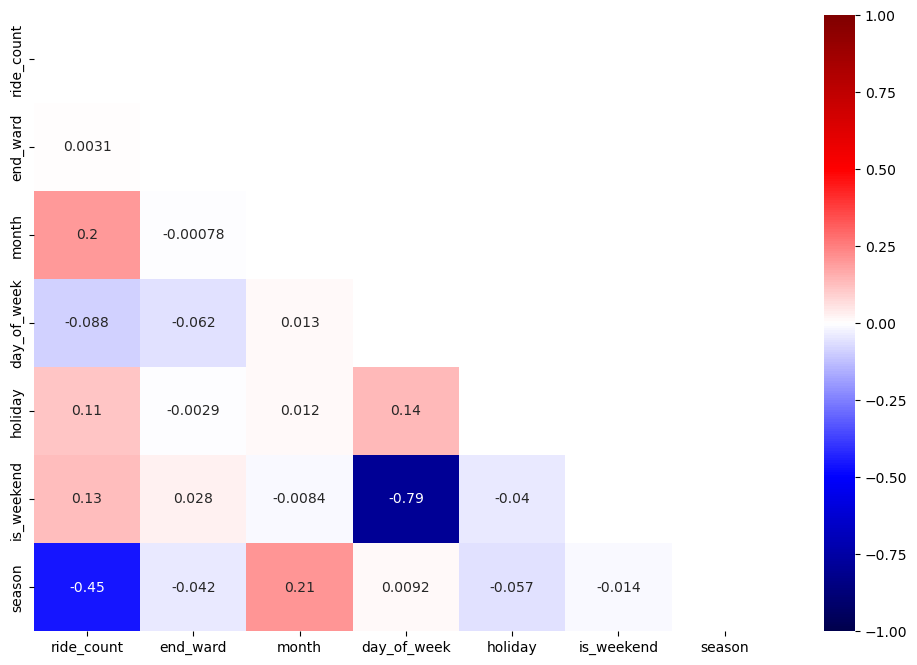

In [26]:
import seaborn as sns

plt.figure(figsize=(12,8))

# Select only numeric columns for correlation
numeric_df = df_daily.select_dtypes(include=['float64', 'int64', 'int32'])
corr = numeric_df.corr()

# Create a mask for the upper triangle
matrix = np.triu(corr)

# Plot the heatmap
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

# Merge dataframe with hourly dataframe

In [27]:
hdf = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\Project 3\cbs_hourly_modified.csv', sep=",")

In [28]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         365 non-null    object
 1   ride_count   365 non-null    int64 
 2   end_ward     365 non-null    int64 
 3   month        365 non-null    int32 
 4   day_of_week  365 non-null    int64 
 5   holiday      365 non-null    int64 
 6   is_weekend   365 non-null    int64 
 7   season       365 non-null    int64 
dtypes: int32(1), int64(6), object(1)
memory usage: 21.5+ KB


In [29]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   casual              26269 non-null  float64
 1   date                26280 non-null  object 
 2   hour                26280 non-null  int64  
 3   member              26269 non-null  float64
 4   total_rides         26269 non-null  float64
 5   relativehumidity    26280 non-null  int64  
 6   temperature         26280 non-null  float64
 7   weathercode         26280 non-null  int64  
 8   windspeed           26280 non-null  float64
 9   holiday             26280 non-null  object 
 10  month               26280 non-null  int64  
 11  season              26280 non-null  object 
 12  day_of_week         26280 non-null  object 
 13  is_weekend          26280 non-null  object 
 14  year                26280 non-null  int64  
 15  weather_category    26280 non-null  object 
 16  temp

In [30]:
df_daily['date'] = pd.to_datetime(df_daily['date'])
hdf['date'] = pd.to_datetime(hdf['date'])


In [31]:
# Ensure the 'date' column is a datetime
hdf['date'] = pd.to_datetime(hdf['date'])

# Aggregate hdf to daily values by taking the mean for the desired columns
hdf_daily = hdf.groupby('date', as_index=False).agg(
    relativehumidity=('relativehumidity', 'mean'),
    temperature=('temperature', 'mean'),
    windspeed=('windspeed', 'mean')
)


In [32]:
# Ensure 'date' in df_daily is also a datetime
df_daily['date'] = pd.to_datetime(df_daily['date'])

# Merge the daily aggregated dataframes on 'date'
df_merged = df_daily.merge(hdf_daily, on='date', how='left')
display(df_merged)


,date,ride_count,end_ward,month,day_of_week,holiday,is_weekend,season,relativehumidity,temperature,windspeed
0,2023-01-01,510,2,1,6,0,0,3,83.375000,10.458333,9.466667
1,2023-01-02,571,2,1,0,0,1,3,83.375000,10.745833,7.525000
2,2023-01-03,631,1,1,1,1,1,3,89.541667,14.229167,13.316667
3,2023-01-04,676,2,1,2,1,1,3,91.250000,15.962500,11.308333
4,2023-01-05,715,2,1,3,1,1,3,83.500000,12.558333,7.295833
...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,166,2,12,2,1,1,3,52.000000,-4.350000,5.241667
361,2023-12-28,560,6,12,3,1,1,3,53.583333,-2.487500,7.650000
362,2023-12-29,640,2,12,4,1,1,3,57.791667,-3.904167,3.966667
363,2023-12-30,461,2,12,5,1,0,3,58.083333,-2.900000,7.933333


In [33]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              365 non-null    datetime64[ns]
 1   ride_count        365 non-null    int64         
 2   end_ward          365 non-null    int64         
 3   month             365 non-null    int32         
 4   day_of_week       365 non-null    int64         
 5   holiday           365 non-null    int64         
 6   is_weekend        365 non-null    int64         
 7   season            365 non-null    int64         
 8   relativehumidity  365 non-null    float64       
 9   temperature       365 non-null    float64       
 10  windspeed         365 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(6)
memory usage: 30.1 KB


## Drop 'date', 'month', 'day_of_week'

In [34]:
# Drop unnecessary columns
df_merged = df_merged.drop(columns=['date', 'month', 'day_of_week'])

In [35]:
df_merged.rename(columns={'relativehumidity': 'humidity'}, inplace=True)

In [36]:
df_merged.head()

,ride_count,end_ward,holiday,is_weekend,season,humidity,temperature,windspeed
0,510,2,0,0,3,83.375000,10.458333,9.466667
1,571,2,0,1,3,83.375000,10.745833,7.525000
2,631,1,1,1,3,89.541667,14.229167,13.316667
3,676,2,1,1,3,91.250000,15.962500,11.308333
4,715,2,1,1,3,83.500000,12.558333,7.295833


In [37]:
# Define features and target variable
multivariate = df_merged.drop('ride_count',axis='columns')
ride_count = df_merged["ride_count"]

print(multivariate.shape)
print(ride_count.shape)


(365, 7)
(365,)


In [38]:
type(ride_count)

pandas.core.series.Series

In [39]:
multivariate.columns

Index(['end_ward', 'holiday', 'is_weekend', 'season', 'humidity',
       'temperature', 'windspeed'],
      dtype='object')

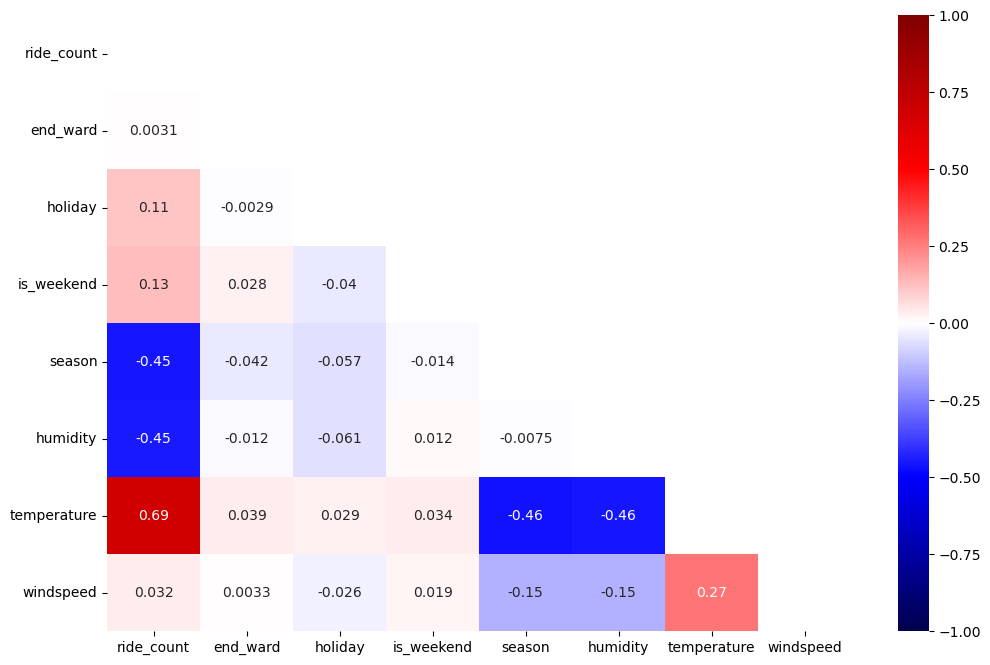

In [40]:
import seaborn as sns

plt.figure(figsize=(12,8))

# Select only numeric columns for correlation
numeric_df = df_merged.select_dtypes(include=['float64', 'int64', 'int32'])
corr = numeric_df.corr()

# Create a mask for the upper triangle
matrix = np.triu(corr)

# Plot the heatmap
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [41]:
df_merged

,ride_count,end_ward,holiday,is_weekend,season,humidity,temperature,windspeed
0,510,2,0,0,3,83.375000,10.458333,9.466667
1,571,2,0,1,3,83.375000,10.745833,7.525000
2,631,1,1,1,3,89.541667,14.229167,13.316667
3,676,2,1,1,3,91.250000,15.962500,11.308333
4,715,2,1,1,3,83.500000,12.558333,7.295833
...,...,...,...,...,...,...,...,...
360,166,2,1,1,3,52.000000,-4.350000,5.241667
361,560,6,1,1,3,53.583333,-2.487500,7.650000
362,640,2,1,1,3,57.791667,-3.904167,3.966667
363,461,2,1,0,3,58.083333,-2.900000,7.933333


In [42]:
# Reshape the dfs to have value for the column instead of a null.

ride_count = ride_count.values.reshape(-1, 1)

print(ride_count.shape)


(365, 1)


In [43]:
type(ride_count)

numpy.ndarray

In [44]:
multivariate.columns

Index(['end_ward', 'holiday', 'is_weekend', 'season', 'humidity',
       'temperature', 'windspeed'],
      dtype='object')

In [45]:
df_merged

,ride_count,end_ward,holiday,is_weekend,season,humidity,temperature,windspeed
0,510,2,0,0,3,83.375000,10.458333,9.466667
1,571,2,0,1,3,83.375000,10.745833,7.525000
2,631,1,1,1,3,89.541667,14.229167,13.316667
3,676,2,1,1,3,91.250000,15.962500,11.308333
4,715,2,1,1,3,83.500000,12.558333,7.295833
...,...,...,...,...,...,...,...,...
360,166,2,1,1,3,52.000000,-4.350000,5.241667
361,560,6,1,1,3,53.583333,-2.487500,7.650000
362,640,2,1,1,3,57.791667,-3.904167,3.966667
363,461,2,1,0,3,58.083333,-2.900000,7.933333


In [46]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


## Predict Ride Count - Multivariate

In [97]:
multivariate_01_train, multivariate_01_test, ride_count_train, ride_count_test = train_test_split(multivariate, ride_count, test_size=0.2, random_state=10)

In [48]:
# # Feature Scaling (VERY IMPORTANT for Linear Regression)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# multivariate_01_train = scaler.fit_transform(multivariate_01_train)
# multivariate_01_test = scaler.transform(multivariate_01_test)

In [98]:
# Checking for Data Leakage
print(df_merged.head())
print(multivariate_01_train.shape, multivariate_01_test.shape)

   ride_count  end_ward  holiday  is_weekend  season   humidity  temperature  \
0         510         2        0           0       3  83.375000    10.458333   
1         571         2        0           1       3  83.375000    10.745833   
2         631         1        1           1       3  89.541667    14.229167   
3         676         2        1           1       3  91.250000    15.962500   
4         715         2        1           1       3  83.500000    12.558333   

   windspeed  
0   9.466667  
1   7.525000  
2  13.316667  
3  11.308333  
4   7.295833  
(292, 7) (73, 7)


In [50]:
# Train the model

reg_multi_01 = linear_model.LinearRegression()
reg_multi_01.fit(multivariate_01_train, ride_count_train)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
# Make predictions using the test data
y_pred = reg_multi_01.predict(multivariate_01_test)

# Evaluate performance
r2_score = round(reg_multi_01.score(multivariate_01_test, ride_count_test) * 100, 2)
mse = mean_squared_error(ride_count_test, y_pred)
mae = mean_absolute_error(ride_count_test, y_pred)

# Print results
print(f"R² Score: {r2_score} %")
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 54.36 %
Mean Squared Error: 35879.73
Root Mean Squared Error: 189.42
Mean Absolute Error: 151.84


In [53]:
# # Predict values using test data.
reg_multi_score = round(reg_multi_01.score(multivariate_01_test, ride_count_test) * 100, 2)
# print("The accuracy of the ML model is:", reg_multi_score , "%")


In [54]:
import pandas as pd

# Define the attributes with correct column names
feature_names = ['end_ward', 'holiday', 'is_weekend', 'season', 'humidity', 'temperature', 'windspeed']

predictions = [2, 0, 0, 1, 20, 10, 10]

# pred_3 = reg_multi_01.predict([predictions]) # Line modified
# pred_3 = reg_multi_01.predict(np.array(predictions).reshape(1, -1))


# Make prediction
pred_6 = reg_multi_01.predict([predictions])

# Print results
print(f"With the following conditions:\n"
      f"end_ward: {predictions[0]}"
      f"\nholiday: {predictions[1]}"
      f"\nis_weekend: {predictions[2]}"
      f"\nseason: {predictions[3]}"
      f"\nrelativehumidity: {predictions[4]}"
      f"\ntemperature: {predictions[5]}"
      f"\nwindspeed: {predictions[6]}"
      f"\n\nWe can expect {pred_6[0][0]:.2f} rides"
      f"\n\nThis model is {reg_multi_score}% accurate" )


With the following conditions:
end_ward: 2
holiday: 0
is_weekend: 0
season: 1
relativehumidity: 20
temperature: 10
windspeed: 10

We can expect 864.39 rides

This model is 54.36% accurate


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Drop End Ward, Holiday, is_weekend

In [55]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ride_count   365 non-null    int64  
 1   end_ward     365 non-null    int64  
 2   holiday      365 non-null    int64  
 3   is_weekend   365 non-null    int64  
 4   season       365 non-null    int64  
 5   humidity     365 non-null    float64
 6   temperature  365 non-null    float64
 7   windspeed    365 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 22.9 KB


In [56]:
multivariate_02 = df_merged.drop(['end_ward', 'holiday', 'is_weekend', 'ride_count'],axis='columns')
ride_count = df_merged["ride_count"]

ride_count = ride_count.values.reshape(-1, 1)

print(multivariate_02.shape)
print(ride_count.shape)

(365, 4)
(365, 1)


In [57]:
# Check for missing values
print("Missing values:\n", df_merged.isnull().sum())

Missing values:
 ride_count     0
end_ward       0
holiday        0
is_weekend     0
season         0
humidity       0
temperature    0
windspeed      0
dtype: int64


In [58]:
multivariate_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       365 non-null    int64  
 1   humidity     365 non-null    float64
 2   temperature  365 non-null    float64
 3   windspeed    365 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 11.5 KB


In [59]:
multivariate_02_train, multivariate_02_test, ride_count_train, ride_count_test = train_test_split(multivariate_02, ride_count, test_size=0.2, random_state=0)

In [60]:
print(multivariate_02_train.shape)
print(multivariate_02_test.shape)
print(ride_count_train.shape)
print(ride_count_test.shape)

(292, 4)
(73, 4)
(292, 1)
(73, 1)


In [61]:
multivariate_02.columns

Index(['season', 'humidity', 'temperature', 'windspeed'], dtype='object')

In [62]:
# Train the model

reg_multi_02 = linear_model.LinearRegression()
reg_multi_02.fit(multivariate_02_train, ride_count_train)

LinearRegression()

In [63]:
# # Predict values using test data.
# reg_multi_score_02 = round(reg_multi_02.score(multivariate_02_test, ride_count_test) * 100, 2)
# print("The accuracy of the ML model based on Living Area is:", reg_multi_score_02 , "%")

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
# Make predictions using the test data
y_pred = reg_multi_02.predict(multivariate_02_test)

reg_multi_score_02 = round(reg_multi_02.score(multivariate_02_test, ride_count_test) * 100, 2)

# Evaluate performance
r2_score = round(reg_multi_02.score(multivariate_02_test, ride_count_test) * 100, 2)
mse = mean_squared_error(ride_count_test, y_pred)
mae = mean_absolute_error(ride_count_test, y_pred)

# Print results
print(f"R² Score: {r2_score} %")
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 51.01 %
Mean Squared Error: 34093.17
Root Mean Squared Error: 184.64
Mean Absolute Error: 149.46


In [66]:
# Enter the attributes ['season', 'humidity', 'temperature', 'windspeed']


predictions_02 = [1, 20, 10, 10]

pred_4 = reg_multi_02.predict([predictions_02])

print(f"With the following conditions: "
f"\nseason: {predictions_02[0]}"
f"\nhumidity: {predictions_02[1]}"
f"\n'temperature: {predictions_02[2]}"
f"\nwindspeedt: {predictions_02[3]}"
f"\n\nWe can expect {pred_4} rides"
f"\n\nThis model is {reg_multi_score_02}% accurate" )

With the following conditions: 
season: 1
humidity: 20
'temperature: 10
windspeedt: 10

We can expect [[1020.12207787]] rides

This model is 51.01% accurate


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Drop Season

In [67]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ride_count   365 non-null    int64  
 1   end_ward     365 non-null    int64  
 2   holiday      365 non-null    int64  
 3   is_weekend   365 non-null    int64  
 4   season       365 non-null    int64  
 5   humidity     365 non-null    float64
 6   temperature  365 non-null    float64
 7   windspeed    365 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 22.9 KB


In [68]:
multivariate_03 = df_merged.drop(['end_ward', 'season', 'holiday', 'is_weekend', 'ride_count'],axis='columns')
ride_count = df_merged["ride_count"]

ride_count = ride_count.values.reshape(-1, 1)

print(multivariate_03.shape)
print(ride_count.shape)

(365, 3)
(365, 1)


In [69]:
multivariate_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   humidity     365 non-null    float64
 1   temperature  365 non-null    float64
 2   windspeed    365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB


In [70]:
multivariate_03_train, multivariate_03_test, ride_count_train, ride_count_test = train_test_split(multivariate_03, ride_count, test_size=0.2, random_state=0)

In [71]:
print(multivariate_03_train.shape)
print(multivariate_03_test.shape)
print(ride_count_train.shape)
print(ride_count_test.shape)

(292, 3)
(73, 3)
(292, 1)
(73, 1)


In [72]:
multivariate_03.columns

Index(['humidity', 'temperature', 'windspeed'], dtype='object')

In [73]:
# Train the model

reg_multi_03 = linear_model.LinearRegression()
reg_multi_03.fit(multivariate_03_train, ride_count_train)

LinearRegression()

In [74]:
# Predict values using test data
y_pred = reg_multi_03.predict(multivariate_03_test)

In [75]:
# Evaluate performance
r2_score = round(reg_multi_03.score(multivariate_03_test, ride_count_test) * 100, 2)
mse = mean_squared_error(ride_count_test, y_pred)
mae = mean_absolute_error(ride_count_test, y_pred)

# Print results
print(f"R² Score: {r2_score} %")
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² Score: 44.85 %
Mean Squared Error: 38378.73
Root Mean Squared Error: 195.90
Mean Absolute Error: 162.96


In [76]:
# # Predict values using test data.
# reg_multi_score_03 = round(reg_multi_03.score(multivariate_03_test, ride_count_test) * 100, 2)
# print("The accuracy of the ML model is:", reg_multi_score_03 , "%")

In [77]:
# Enter the attributes ['humidity', 'temperature', 'windspeed']

reg_multi_score_03 = round(reg_multi_03.score(multivariate_03_test, ride_count_test) * 100, 2)

predictions_03 = [20, 10, 10]

pred_3 = reg_multi_03.predict([predictions_03])

print(f"With the following conditions: "
f"\nhumidity: {predictions_03[0]}"
f"\ntemperature: {predictions_03[1]}"
f"\nwindspeed: {predictions_03[2]}"
f"\n\nWe can expect {pred_3} rides"
f"\n\nThis model is {reg_multi_score_03}% accurate" )

With the following conditions: 
humidity: 20
temperature: 10
windspeed: 10

We can expect [[935.79418237]] rides

This model is 44.85% accurate


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [78]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(multivariate_02, ride_count)

LinearRegression()

In [92]:

# # Fitting Polynomial Regression to the dataset
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree = 4)
# X_poly = poly.fit_transform(multivariate_02)

# poly.fit(X_poly, ride_count)
# lin2 = LinearRegression()
# lin2.fit(X_poly, ride_count)

In [93]:
# print(multivariate_02.shape)
# print(ride_count.shape)

In [94]:
# # Getting the R^2 score (prediction score) for the model
# score = lin2.score(X_poly, ride_count)
# print(f"Prediction score (R^2) for Polynomial Regression: {score}")


# Evaluation

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a function with multiple ML models
def models(X_train, Y_train, X_test, Y_test):
    # Convert Y_train to a 1D array
    Y_train = Y_train.ravel()

    ### 1️⃣ Linear Regression ###
    linreg = LinearRegression()
    linreg.fit(X_train, Y_train)
    linreg_score = linreg.score(X_test, Y_test) 

    ### 2️⃣ K-Nearest Neighbors Regression ###
    knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, Y_train)

    ### 3️⃣ Decision Tree Regression ###
    tree = DecisionTreeRegressor(criterion='squared_error', random_state=0)
    tree.fit(X_train, Y_train)

    ### 4️⃣ Random Forest Regression ###
    forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
    forest.fit(X_train, Y_train)

    ### ✅ Print Model Scores ###
    print(f"Linear Regression R² Score: {linreg.score(X_test, Y_test):.4f}")
    print(f"KNN R² Score: {knn.score(X_test, Y_test):.4f}")
    print(f"Decision Tree R² Score: {tree.score(X_test, Y_test):.4f}")
    print(f"Random Forest R² Score: {forest.score(X_test, Y_test):.4f}")

    return linreg, knn, tree, forest

# Call the function with the proper train-test split
models(multivariate_01_train, ride_count_train, multivariate_01_test, ride_count_test)


Linear Regression R² Score: -0.0279
KNN R² Score: -0.3730
Decision Tree R² Score: -1.3626
Random Forest R² Score: -0.1755


(LinearRegression(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(random_state=0),
 RandomForestRegressor(random_state=0))

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a function with multiple ML models
def models(X_train, Y_train, X_test, Y_test):
    # Convert Y_train to a 1D array
    Y_train = Y_train.ravel()

    ### 1️⃣ Linear Regression ###
    linreg = LinearRegression()
    linreg.fit(X_train, Y_train)

    ### 2️⃣ K-Nearest Neighbors Regression ###
    knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, Y_train)

    ### 3️⃣ Decision Tree Regression ###
    tree = DecisionTreeRegressor(criterion='squared_error', random_state=0)
    tree.fit(X_train, Y_train)

    ### 4️⃣ Random Forest Regression ###
    forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
    forest.fit(X_train, Y_train)

    ### ✅ Print Model Scores ###
    print(f"Linear Regression R² Score: {linreg.score(X_test, Y_test):.4f}")
    print(f"KNN R² Score: {knn.score(X_test, Y_test):.4f}")
    print(f"Decision Tree R² Score: {tree.score(X_test, Y_test):.4f}")
    print(f"Random Forest R² Score: {forest.score(X_test, Y_test):.4f}")

    return linreg, knn, tree, forest

# Call the function with the proper train-test split
models(multivariate_02_train, ride_count_train, multivariate_02_test, ride_count_test)

Linear Regression R² Score: 0.5101
KNN R² Score: 0.5256
Decision Tree R² Score: 0.2951
Random Forest R² Score: 0.6154


(LinearRegression(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(random_state=0),
 RandomForestRegressor(random_state=0))

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a function with multiple ML models
def models(X_train, Y_train, X_test, Y_test):
    # Standardize features (recommended for KNN & Linear Regression)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Convert Y_train to a 1D array
    Y_train = Y_train.ravel()

    ### 1️⃣ Linear Regression ###
    linreg = LinearRegression()
    linreg.fit(X_train, Y_train)

    ### 2️⃣ K-Nearest Neighbors Regression ###
    knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, Y_train)

    ### 3️⃣ Decision Tree Regression ###
    tree = DecisionTreeRegressor(criterion='squared_error', random_state=0)
    tree.fit(X_train, Y_train)  # Now using scaled data

    ### 4️⃣ Random Forest Regression ###
    forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
    forest.fit(X_train, Y_train)  # Now using scaled data

    ### ✅ Print Model Scores ###
    print(f"Linear Regression R² Score: {linreg.score(X_test, Y_test):.4f}")
    print(f"KNN R² Score: {knn.score(X_test, Y_test):.4f}")
    print(f"Decision Tree R² Score: {tree.score(X_test, Y_test):.4f}")
    print(f"Random Forest R² Score: {forest.score(X_test, Y_test):.4f}")

    return linreg, knn, tree, forest

# Call the function with the proper train-test split
models(multivariate_03_train, ride_count_train, multivariate_03_test, ride_count_test)

Linear Regression R² Score: 0.4485
KNN R² Score: 0.5305
Decision Tree R² Score: 0.2428
Random Forest R² Score: 0.5985


(LinearRegression(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(random_state=0),
 RandomForestRegressor(random_state=0))

## MAE

In [84]:
# # Features: 'end_ward', 'holiday', 'is_weekend', 'season', 'humidity', 'temperature', 'windspeed'
# from sklearn.metrics import mean_absolute_error

# # Generate predictions using the test data
# y_pred = reg_multi_01.predict(multivariate_01_test)

# # Calculate and print the Mean Absolute Error
# print("MAE", mean_absolute_error(ride_count_test, y_pred))

In [85]:
# # Features: 'season', 'humidity', 'temperature', 'windspeed'
# # Generate predictions using the test data
# y_pred = reg_multi_02.predict(multivariate_02_test)

# # Calculate and print the Mean Absolute Error
# print("MAE", mean_absolute_error(ride_count_test, y_pred))

In [86]:
# # Features:  'humidity', 'temperature', 'windspeed'
# # Generate predictions using the test data
# y_pred = reg_multi_03.predict(multivariate_03_test)

# # Calculate and print the Mean Absolute Error
# print("MAE", mean_absolute_error(ride_count_test, y_pred))

## MSE

In [87]:
# # Features: 'end_ward', 'holiday', 'is_weekend', 'season', 'relativehumidity', 'temperature', 'windspeed'
# from sklearn.metrics import mean_absolute_error

# # Generate predictions using the test data
# y_pred = reg_multi_01.predict(multivariate_01_test)

# from sklearn.metrics import mean_squared_error
# print("MSE",mean_squared_error(ride_count_test,y_pred))

In [88]:
# # Features: 'season', 'humidity', 'temperature', 'windspeed'
# from sklearn.metrics import mean_absolute_error

# # Generate predictions using the test data
# y_pred = reg_multi_02.predict(multivariate_02_test)

# from sklearn.metrics import mean_squared_error
# print("MSE",mean_squared_error(ride_count_test,y_pred))

In [89]:
# # Features:  'humidity', 'temperature', 'windspeed'
# from sklearn.metrics import mean_absolute_error

# # Generate predictions using the test data
# y_pred = reg_multi_03.predict(multivariate_03_test)

# from sklearn.metrics import mean_squared_error
# print("MSE",mean_squared_error(ride_count_test,y_pred))

In [90]:
# Define the metrics for each model
metrics_data = {
    "Model": ["7 Features", "4 Features", "3 Features"],
    "R² Score (%)": [reg_multi_score, reg_multi_score_02, reg_multi_score_03],
    "Mean Absolute Error (MAE)": [
        mean_absolute_error(ride_count_test, reg_multi_01.predict(multivariate_01_test)),
        mean_absolute_error(ride_count_test, reg_multi_02.predict(multivariate_02_test)),
        mean_absolute_error(ride_count_test, reg_multi_03.predict(multivariate_03_test))
    ],
    "Mean Squared Error (MSE)": [
        mean_squared_error(ride_count_test, reg_multi_01.predict(multivariate_01_test)),
        mean_squared_error(ride_count_test, reg_multi_02.predict(multivariate_02_test)),
        mean_squared_error(ride_count_test, reg_multi_03.predict(multivariate_03_test))
    ]
}

# Create the dataframe
metrics_df = pd.DataFrame(metrics_data)

# Add a column for Root Mean Squared Error (RMSE)
metrics_df["Root Mean Squared Error (RMSE)"] = [
    np.sqrt(mean_squared_error(ride_count_test, reg_multi_01.predict(multivariate_01_test))),
    np.sqrt(mean_squared_error(ride_count_test, reg_multi_02.predict(multivariate_02_test))),
    np.sqrt(mean_squared_error(ride_count_test, reg_multi_03.predict(multivariate_03_test)))
]

# Display the dataframe
metrics_df.round(2)

,Model,R² Score (%),Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
0,7 Features,54.36,305.73,147472.56,384.02
1,4 Features,51.01,149.46,34093.17,184.64
2,3 Features,44.85,162.96,38378.73,195.90


## Polynomial Regression

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Creating polynomial features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(multivariate_02)

# Fitting the polynomial regression model
lin2 = LinearRegression()
lin2.fit(X_poly, ride_count)

# Getting the R^2 score
score = lin2.score(X_poly, ride_count)
print(f"Prediction score (R^2) for Polynomial Regression: {score}")

# Making predictions
y_pred = lin2.predict(X_poly)

# Calculating error metrics
mae = mean_absolute_error(ride_count, y_pred)
mse = mean_squared_error(ride_count, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Prediction score (R^2) for Polynomial Regression: 0.7752867586216347
Mean Absolute Error (MAE): 106.58678027804314
Mean Squared Error (MSE): 20096.135969223338
Root Mean Squared Error (RMSE): 141.76084074674267


In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Creating polynomial features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(multivariate)

# Fitting the polynomial regression model
lin2 = LinearRegression()
lin2.fit(X_poly, ride_count)

# Getting the R^2 score
score = lin2.score(X_poly, ride_count)
print(f"Prediction score (R^2) for Polynomial Regression: {score}")

# Making predictions
y_pred = lin2.predict(X_poly)

# Calculating error metrics
mae = mean_absolute_error(ride_count, y_pred)
mse = mean_squared_error(ride_count, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Prediction score (R^2) for Polynomial Regression: 0.9011123890033047
Mean Absolute Error (MAE): 67.57091087269124
Mean Squared Error (MSE): 8843.5326021361
Root Mean Squared Error (RMSE): 94.04005849708994
